
# Spotify Data Analysis Report

**Name:** Collin  
**Date:** Oct 11, 2024  
**Report Name:** Analyzing Recently Listened Spotify Tracks



### Hypothesis
The hypothesis for this report is that there is a relationship between the tempo, valence, and energy of the songs listened to and the mood or energy level of the listener. Faster songs with more energy may indicate a more active mood, while slower songs with lower energy might indicate a calm or relaxed mood.



### Setting Up Libraries
Here I am importing the libraries needed for this analysis. I used `requests` to make API calls to Spotify and `pandas` to organize the data.


In [1]:
import pandas as pd
import json
import requests
import base64
import urllib.parse
import webbrowser
import matplotlib.pyplot as plt
from pytz import timezone

In [2]:
keys = pd.read_csv(r"Spotify_Keys.txt")

CLIENT_ID = keys['Client_ID'].iloc[0]
CLIENT_SECRET = keys['Client_Secret'].iloc[0]
REDIRECT_URI = 'http://localhost:8888/callback'
SCOPE = 'user-read-recently-played'

In [3]:
def get_authorization_url():
    params = {
        'client_id': CLIENT_ID,
        'response_type': 'code',
        'redirect_uri': REDIRECT_URI,
        'scope': SCOPE
    }
    url = 'https://accounts.spotify.com/authorize?' + urllib.parse.urlencode(params)
    return url

# Redirect user to the Spotify authorization page
authorization_url = get_authorization_url()
print("Please go to the following URL and authorize the application:")
print(authorization_url)
webbrowser.open(authorization_url)
authorization_code = input("Paste the authorization code here: ")

Please go to the following URL and authorize the application:
https://accounts.spotify.com/authorize?client_id=5fe56530caf643f4ba286abb3b2ecb35&response_type=code&redirect_uri=http%3A%2F%2Flocalhost%3A8888%2Fcallback&scope=user-read-recently-played


Paste the authorization code here:  AQC_1p87DCHPg_Hl5ImsqICz4tmBc4_L65Af2RX-M3_DRtY_xmIrg5OYqkFUQzwX6srr_sFhBNp1rE7ja15MvrbeiWfMAo6kjzi3OSacMNF3W6flPH8wi9QHZ54zY0ldievnVrAP6ehxiNb5zFbm1VN_QIDuxQIgrEvRtIb4Jp2_tIrJ7FZuRMuq7gnYN66P3ugjoIT17dUvP6Awcg



### Collecting Data from Spotify API
In this part, I used the Spotify API to get my recently played songs. This endpoint (`/v1/me/player/recently-played`) gives the last 50 tracks I've listened to. This data includes the track name, artist, time it was played, and the track ID. I stored this information in a pandas DataFrame to make it easier to work with.

#### How I Researched Access Tokens
To use the Spotify API, I needed an access token for authentication. I followed the Spotify API documentation and what we did in class to set up a developer account, register an app. but to use OAuth to get an access token, I had to do more research. At first, it was confusing since the tokens expire quickly, but I watched a few YouTube tutorials and read some blogs to better understand it.

One issue I faced was the **access token expiration**, which required me to frequently generate a new token.


In [4]:
def get_access_token(auth_code):
    url = 'https://accounts.spotify.com/api/token'
    headers = {
        'Authorization': 'Basic ' + base64.b64encode(f"{CLIENT_ID}:{CLIENT_SECRET}".encode()).decode()
    }
    data = {
        'grant_type': 'authorization_code',
        'code': auth_code,
        'redirect_uri': REDIRECT_URI
    }
    response = requests.post(url, data=data, headers=headers)
    if response.status_code == 200:
        response_data = response.json()
        return response_data['access_token'], response_data['refresh_token']
    else:
        raise Exception(f"Failed to get access token: {response.status_code}, {response.text}")

access_token, refresh_token = get_access_token(authorization_code)
print("Access Token:", access_token)

def get_recently_played_tracks(access_token):
    url = 'https://api.spotify.com/v1/me/player/recently-played?limit=50'
    headers = {
        'Authorization': f'Bearer {access_token}'
    }
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        return response.json()['items']
    else:
        raise Exception(f"Failed to get recently played tracks: {response.status_code}, {response.text}")

# Use your access token here
recently_played = get_recently_played_tracks(access_token)

# Extracting track information
track_data = []
for item in recently_played:
    track_data.append({
        'track_id': item['track']['id'],
        'played_at': item['played_at']
    })

recently_played_df = pd.DataFrame(track_data)
recently_played_df

Access Token: BQA2zPhNGO9PRTJAI6HR5F8nM-NYbpfTyLsndjL3e2MIfb9q4wNCCqrjhmt5bColJPSG53LmLbTu1OU3BcYF2H8255ev6CNp_ywgPo_wkCimf6YHVSgW4loL8OTNLQimQ4lr4IP4AAgPtutTuJr89X2SuRhhTpYvZLX90dkxr2EtVF3fSaLa1871tl3j8AFuKFcA1-2zLRh0zCGxuZU


,track_id,played_at
0,3pANfZVFdtuVnJsE6xa5Ox,2024-10-11T19:57:50.098Z
1,2j1sidmX6SF8YeJZ9w5sv4,2024-10-11T19:55:32.508Z
2,11iIikXxC6NP0Ma8vMD27x,2024-10-11T19:47:50.107Z
3,2mHpiUVtrP1MVRhLKE2z9u,2024-10-11T19:45:13.625Z
4,4pY1okPrJvIPBQM0t4i28v,2024-10-11T19:42:22.935Z
5,415aR5b8Uws9UPGTsssWaS,2024-10-11T19:39:00.228Z
6,2HaIG2YHoq157V2RBMogzW,2024-10-11T19:35:23.565Z
7,4KhuflMu0BIFdB2mXHBwHk,2024-10-11T19:31:13.120Z
8,4dHdqpGaO9km4TEw9nNQSR,2024-10-11T19:29:25.237Z
9,2PfkfkaO9okAk0OxC4ggy5,2024-10-11T19:25:13.544Z



### Adding Audio Features to the Data
Here, I used the Spotify "Audio Features" endpoint (`/v1/audio-features/{id}`) to get more details about each track, such as tempo, energy, valence, and danceability. I used the track IDs collected in the previous step to request this additional data.

#### How I Created the Function
I wrote a loop to request audio features for each track ID. To figure this out, I referred to the Spotify API documentation and also looked up examples on Stack Overflow. The goal was to automate the process of collecting this data.

One problem I encountered was **rate limiting**. Spotify limits the number of API calls allowed in a short period. If I exceeded this limit, I had to wait and try again later.


In [5]:
def track_audio_features(track_id, access_token):
    url = f'https://api.spotify.com/v1/audio-features/{track_id}'
    headers = {
        'Authorization': f'Bearer {access_token}'
    }
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        return response.json()
    else:
        raise Exception(f"Failed to get track audio features: {response.status_code}, {response.text}")

# Fetch audio features for all recently played tracks
track_features = []
for track_id in recently_played_df['track_id']:
    track_features.append(track_audio_features(track_id, access_token))

track_features_df = pd.DataFrame(track_features)
track_features_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.497,0.6380,1,-5.310,1,0.0274,0.046700,0.000000,0.3850,0.7700,172.010,audio_features,3pANfZVFdtuVnJsE6xa5Ox,spotify:track:3pANfZVFdtuVnJsE6xa5Ox,https://api.spotify.com/v1/tracks/3pANfZVFdtuV...,https://api.spotify.com/v1/audio-analysis/3pAN...,137142,4
1,0.431,0.5030,2,-6.365,1,0.0359,0.811000,0.000015,0.1280,0.3890,159.723,audio_features,2j1sidmX6SF8YeJZ9w5sv4,spotify:track:2j1sidmX6SF8YeJZ9w5sv4,https://api.spotify.com/v1/tracks/2j1sidmX6SF8...,https://api.spotify.com/v1/audio-analysis/2j1s...,461934,4
2,0.467,0.7570,3,-5.093,1,0.0330,0.080700,0.908000,0.0876,0.4330,82.282,audio_features,11iIikXxC6NP0Ma8vMD27x,spotify:track:11iIikXxC6NP0Ma8vMD27x,https://api.spotify.com/v1/tracks/11iIikXxC6NP...,https://api.spotify.com/v1/audio-analysis/11iI...,155933,4
3,0.427,0.1080,1,-19.189,1,0.0324,0.945000,0.000005,0.1160,0.2760,127.155,audio_features,2mHpiUVtrP1MVRhLKE2z9u,spotify:track:2mHpiUVtrP1MVRhLKE2z9u,https://api.spotify.com/v1/tracks/2mHpiUVtrP1M...,https://api.spotify.com/v1/audio-analysis/2mHp...,170182,3
4,0.549,0.4010,2,-9.841,1,0.4390,0.686000,0.000121,0.3640,0.4170,160.994,audio_features,4pY1okPrJvIPBQM0t4i28v,spotify:track:4pY1okPrJvIPBQM0t4i28v,https://api.spotify.com/v1/tracks/4pY1okPrJvIP...,https://api.spotify.com/v1/audio-analysis/4pY1...,202247,3
5,0.372,0.7810,4,-7.969,1,0.0496,0.000269,0.000248,0.1690,0.4660,122.979,audio_features,415aR5b8Uws9UPGTsssWaS,spotify:track:415aR5b8Uws9UPGTsssWaS,https://api.spotify.com/v1/tracks/415aR5b8Uws9...,https://api.spotify.com/v1/audio-analysis/415a...,216146,4
6,0.482,0.2050,1,-12.915,0,0.0434,0.772000,0.000000,0.1100,0.3740,95.625,audio_features,2HaIG2YHoq157V2RBMogzW,spotify:track:2HaIG2YHoq157V2RBMogzW,https://api.spotify.com/v1/tracks/2HaIG2YHoq15...,https://api.spotify.com/v1/audio-analysis/2HaI...,249926,4
7,0.550,0.6290,5,-12.919,1,0.0348,0.615000,0.000000,0.0677,0.7410,170.012,audio_features,4KhuflMu0BIFdB2mXHBwHk,spotify:track:4KhuflMu0BIFdB2mXHBwHk,https://api.spotify.com/v1/tracks/4KhuflMu0BIF...,https://api.spotify.com/v1/audio-analysis/4Khu...,107361,4
8,0.589,0.6050,8,-7.237,1,0.0273,0.065800,0.000000,0.3320,0.5030,95.084,audio_features,4dHdqpGaO9km4TEw9nNQSR,spotify:track:4dHdqpGaO9km4TEw9nNQSR,https://api.spotify.com/v1/tracks/4dHdqpGaO9km...,https://api.spotify.com/v1/audio-analysis/4dHd...,251281,3
9,0.425,0.3400,2,-11.208,1,0.0350,0.258000,0.000000,0.1170,0.1170,134.981,audio_features,2PfkfkaO9okAk0OxC4ggy5,spotify:track:2PfkfkaO9okAk0OxC4ggy5,https://api.spotify.com/v1/tracks/2PfkfkaO9okA...,https://api.spotify.com/v1/audio-analysis/2Pfk...,270429,3



### Merging DataFrames
After collecting the track data and audio features, I merged the two DataFrames to create a complete dataset. This allows me to analyze both the track information and the song features together.


In [6]:
# Merge recently played data with track features on track ID
combined_df = pd.merge(recently_played_df, track_features_df, left_on='track_id', right_on='id')

# Convert played_at to datetime in EST timezone
combined_df['played_at'] = pd.to_datetime(combined_df['played_at']).dt.tz_convert('US/Eastern').dt.tz_localize(None)


### Importing Depression
After compiling the data, I created a csv file with a list of when I have been feeling depressed. This is then displayed on the figure to see if there is a corrolation.


In [7]:
# Drop rows with NaN values (i.e., hours where no listening occurred)
combined_df.dropna(inplace=True)

# Load depressive episodes data
depressive_episodes_df = pd.read_csv('depressive_episodes.csv')

depressive_episodes_df['date'] = pd.to_datetime(depressive_episodes_df['date'])

# Rename columns in depressive_episodes_df to avoid conflicts before merging
depressive_episodes_df.rename(columns={'depressive_episode': 'episode_status'}, inplace=True)
# Reset index for further processing
combined_df.reset_index(inplace=True)
# Drop unnecessary columns
columns_to_drop = ['time_signature', 'key', 'mode', 'id', 'date']
combined_df.drop(columns=[col for col in columns_to_drop if col in combined_df.columns], inplace=True)


combined_df.sort_values(by='played_at', inplace=True)

                 date  episode_status
0 2024-10-11 15:59:00               1
1 2024-10-11 13:23:00               1
2 2024-10-11 14:12:00               1
3 2024-10-11 14:23:00               1


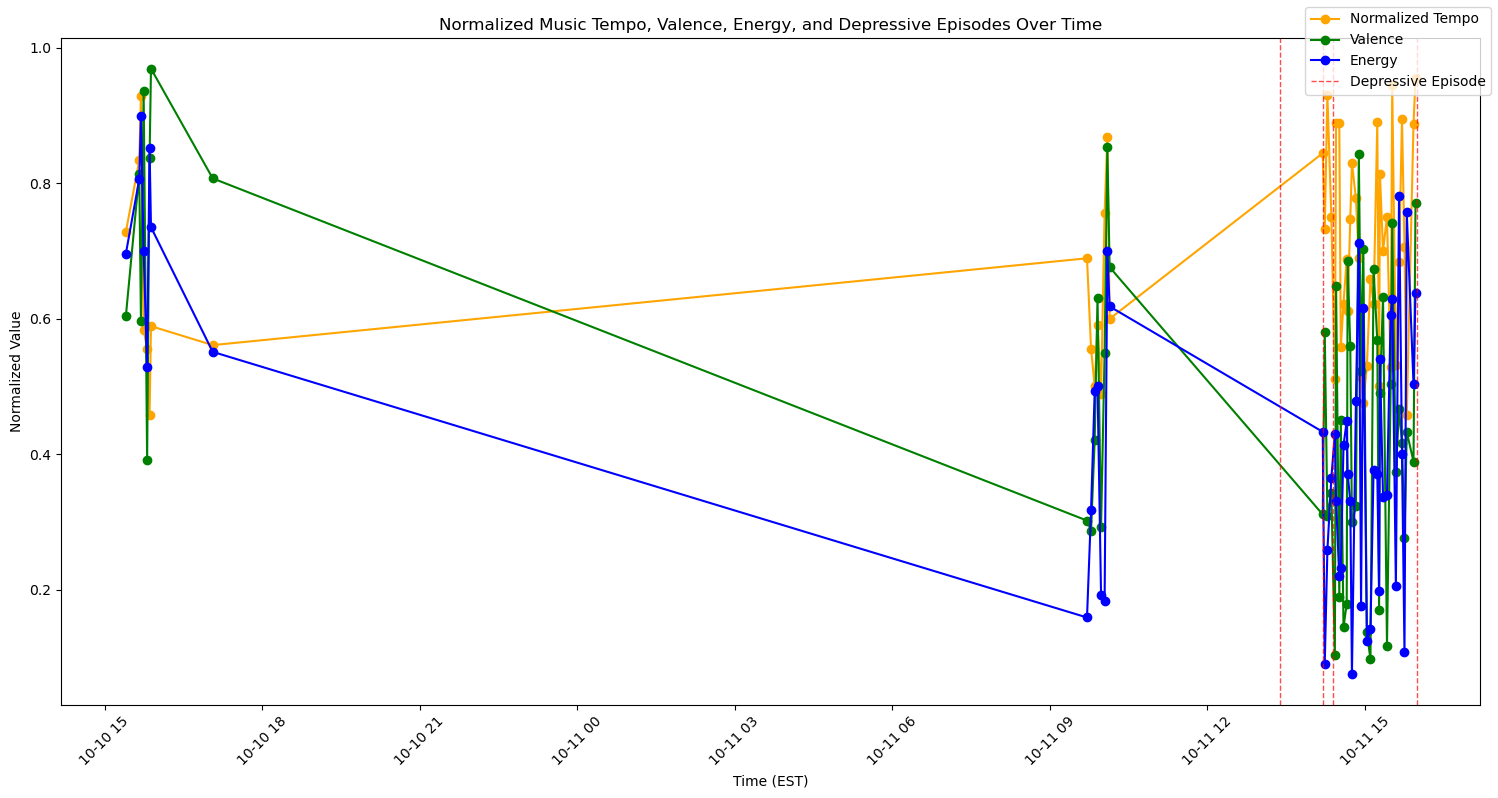

In [8]:
# Normalize the values for tempo, valence, and energy using fixed ranges
combined_df['tempo_normalized'] = combined_df['tempo'] / 180  # Assuming tempo ranges from 0 to 180 BPM
combined_df['valence_normalized'] = combined_df['valence']  # Valence is already in the range of 0 to 1
combined_df['energy_normalized'] = combined_df['energy']  # Energy is already in the range of 0 to 1

# Verify if depressive episodes file is being read correctly
print(depressive_episodes_df.head())

# Plotting the normalized tempo, valence, energy, and depressive episodes over time on the same figure
fig, ax = plt.subplots(figsize=(15, 8))

# Plot Normalized Tempo
ax.plot(combined_df['played_at'], combined_df['tempo_normalized'], marker='o', linestyle='-', label='Normalized Tempo', color='orange')

# Plot Valence
ax.plot(combined_df['played_at'], combined_df['valence_normalized'], marker='o', linestyle='-', label='Valence', color='green')

# Plot Energy
ax.plot(combined_df['played_at'], combined_df['energy_normalized'], marker='o', linestyle='-', label='Energy', color='blue')

# Plot Red Lines for Depressive Episodes
for idx, row in depressive_episodes_df.iterrows():
    if row['episode_status'] == 1:
        ax.axvline(x=row['date'], color='red', linestyle='--', alpha=0.7, linewidth=1, label='Depressive Episode' if idx == depressive_episodes_df.index[0] else '')

# Set labels and title for the plot
ax.set_xlabel('Time (EST)')
ax.set_ylabel('Normalized Value')
plt.title('Normalized Music Tempo, Valence, Energy, and Depressive Episodes Over Time')
plt.xticks(rotation=45)
fig.legend(loc='upper right')
plt.tight_layout()
plt.show()


### Reflections and Conclusions
Based on the data collected, it is possible to see some patterns in the tempo, energy, and valence of the recently played tracks. For example, there may be different energy levels where me happening to feel bad orrurs. However, because of the small dataset size, these patterns might not be fully reliable.

To get better results, it would be good to collect data over a longer time period. This would help in identifying more accurate trends. Another approach could be to use other APIs to add more context, such as mood or activity information, as well as a full listening history.

In conclusion, the analysis shows that there might be a link between song features and mood, but more data is needed for a strong conclusion.
